In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
train = train.astype('float64')
test = test.astype('float64')

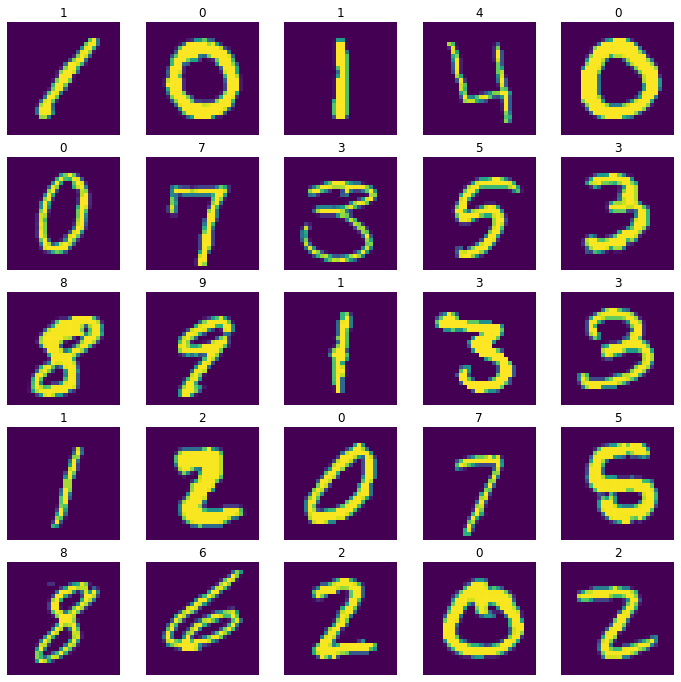

In [8]:
fig, axes = plt.subplots(5, 5, figsize = (12,12))
axes = axes.ravel()

for i in range(25):
    axes[i].imshow(train.iloc[i, 1:].values.reshape(28, 28))
    axes[i].set_title(int(train.iloc[i, 0]))
    axes[i].axis('off')

In [10]:
X_train = train.iloc[:, 1:].values
y_train = train.iloc[:, 0].values
X_test = test.iloc[:, 0:].values

In [12]:
X_train, X_test = X_train/255, X_test/255

In [14]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))


In [16]:
X_test.shape[0]
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

In [33]:
callback = [EarlyStopping(monitor='val_loss', patience = 5),
            ModelCheckpoint(filepath='best_model.h5', monitor = 'val_loss', save_best_only=True)
            ]

In [40]:
cnn_model = Sequential()
cnn_model.add(Conv2D(64, 3, 3, activation='relu'))
cnn_model.add(Conv2D(32, 3, 3, activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.2))
cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(output_dim = 16, activation = 'relu'))
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [41]:
cnn_fit = cnn_model.fit(
    X_train,
    y_train,
    batch_size=1024,
    epochs=100,
    verbose=1,
    validation_data=(X_val,y_val),
    callbacks=callback
)

Train on 26880 samples, validate on 6720 samples
Epoch 1/100
26880/26880 [==============================] - 3s 124us/step - loss: 2.3011 - accuracy: 0.1134 - val_loss: 2.2984 - val_accuracy: 0.1091
Epoch 2/100
26880/26880 [==============================] - 3s 110us/step - loss: 2.2787 - accuracy: 0.1441 - val_loss: 2.2281 - val_accuracy: 0.1327
Epoch 3/100
26880/26880 [==============================] - 3s 111us/step - loss: 2.1083 - accuracy: 0.2061 - val_loss: 1.9145 - val_accuracy: 0.2375
Epoch 4/100
26880/26880 [==============================] - 3s 105us/step - loss: 1.7778 - accuracy: 0.2745 - val_loss: 1.5287 - val_accuracy: 0.3262
Epoch 5/100
26880/26880 [==============================] - 3s 103us/step - loss: 1.4411 - accuracy: 0.4381 - val_loss: 1.1427 - val_accuracy: 0.7000
Epoch 6/100
26880/26880 [==============================] - 3s 103us/step - loss: 1.1045 - accuracy: 0.6487 - val_loss: 0.7354 - val_accuracy: 0.8004
Epoch 7/100
26880/26880 [==============================] 

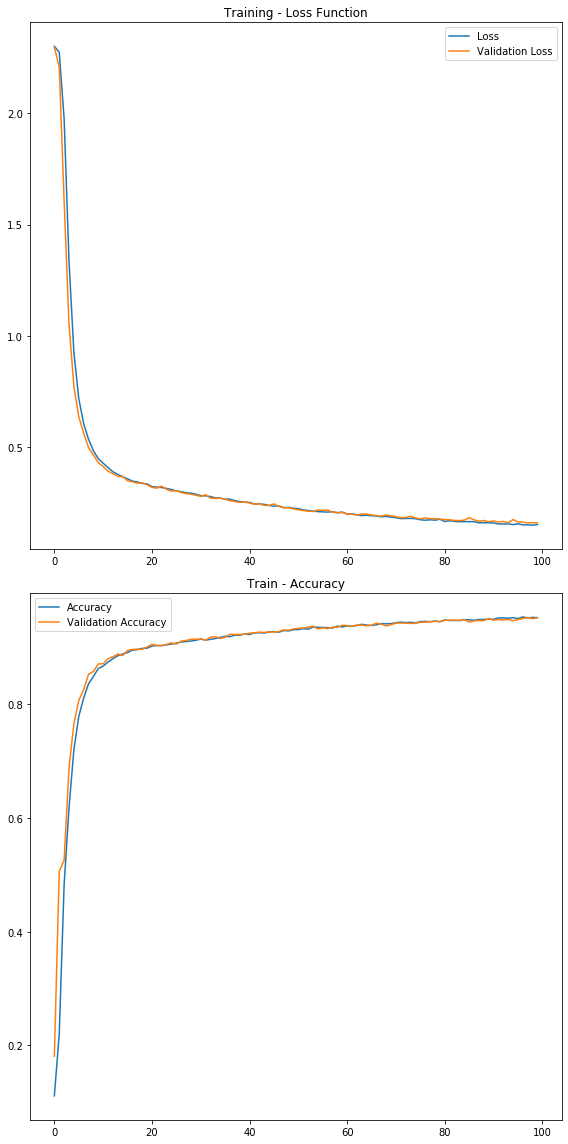

In [37]:

fig, axes = plt.subplots(2, 1, figsize = (8, 16))
axes = axes.ravel()

axes[0].plot(cnn_fit.history['loss'], label='Loss')
axes[0].plot(cnn_fit.history['val_loss'], label='Validation Loss')
axes[0].legend()
axes[0].set_title('Training - Loss Function')

axes[1].plot(cnn_fit.history['accuracy'], label='Accuracy')
axes[1].plot(cnn_fit.history['val_accuracy'], label='Validation Accuracy')
axes[1].legend()
axes[1].set_title('Train - Accuracy')

fig.tight_layout()

In [38]:
y_pred = cnn_model.predict_classes(X_test)

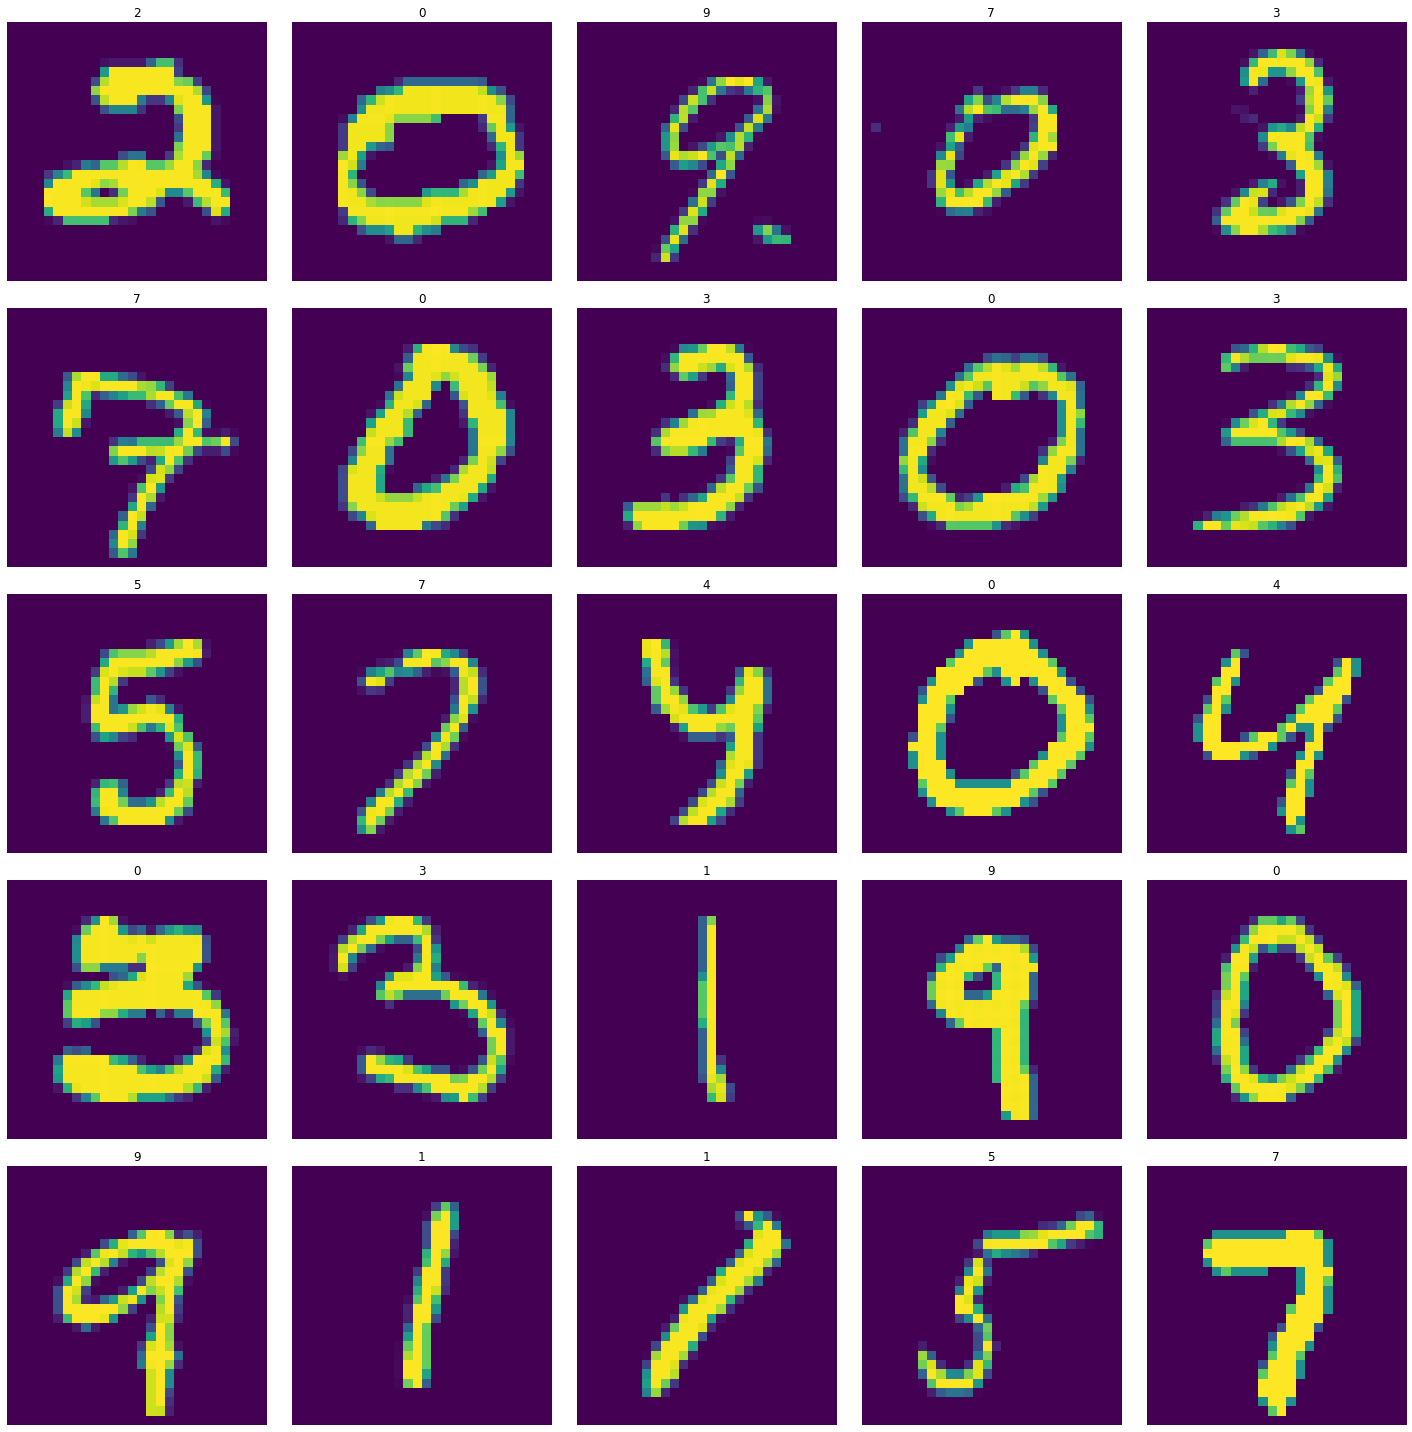

In [39]:
fig, axes = plt.subplots(5, 5, figsize = (20,20))
axes = axes.ravel()
for i in range(25):
    axes[i].imshow(X_test[i].reshape(28, 28))
    axes[i].set_title(y_pred[i])
    axes[i].axis('off')
fig.tight_layout()

In [32]:
results = pd.Series(y_pred, name='label')
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("mnist.csv",index=False)